In [1]:
import numpy as np, pylab,sys
import matplotlib.pyplot as plt
%matplotlib inline  

In [60]:
def get_stats(log_mass,conc, bins):
    median_conc = np.empty(len(bins)-1)
    quar1_conc = np.empty(len(bins)-1)
    quar2_conc = np.empty(len(bins)-1)

    for i in range(len(bins)-1):
        mass_index = np.where((log_mass>bins[i]) & (log_mass<bins[i+1]))
        if(np.size(mass_index)>1):
            conc_index = conc[mass_index]
            print np.size(mass_index)
            median_conc[i] = np.percentile(conc_index, 50)
            quar1_conc[i] = np.percentile(conc_index, 10)
            quar2_conc[i] = np.percentile(conc_index, 90)
        else:
            median_conc[i] = median_conc[i-1]
            quar1_conc[i] = quar1_conc[i-1]
            quar2_conc[i] = quar2_conc[i-1]
                                      
    return median_conc,quar1_conc,quar2_conc

def enlarge_labels(ax,fsize):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(fsize)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(fsize)
        label_y.set_family('serif')

In [61]:
density_filename = "../data/results/jc/MultiDark/Rvir_Mvir_fitparams_Multidark.dat"
velocity_filename = "../data/results/MDmini/velocity/results.csv"
mass_filename = "../data/results/MDmini/mass/results.csv"
centers = "../data/results/MDmini/centers.csv"

In [62]:
data_density = np.loadtxt(density_filename)
data_velocity = np.loadtxt(velocity_filename, delimiter=",")
data_mass = np.loadtxt(mass_filename, delimiter=",")
data_centers = np.loadtxt(centers, delimiter=",")

In [63]:
# mass here is the virial mass
mass_density = data_density[:,1]*1.0E10
conc_density = data_density[:,0]/data_density[:,2]
log_mass_density = np.log10(mass_density)

particle_mass = 8.721E9

mass_velocity = data_velocity[:,7]*particle_mass
conc_velocity = data_velocity[:,4]
log_mass_velocity = np.log10(mass_velocity)

mass_mass  = data_mass[:,8]*particle_mass
conc_mass = data_mass[:,4]
log_mass_mass = np.log10(mass_mass)


#center offset
log_mass_centers = np.log10(data_centers[:,11]*particle_mass)
delta_center = np.sqrt((data_centers[:,1] - data_centers[:,4])**2
                    + (data_centers[:,2] - data_centers[:,5])**2
                    + (data_centers[:,3] - data_centers[:,6])**2)
#delta_center = delta_center/data_velocity[:,6]

(0.0, 50.0)

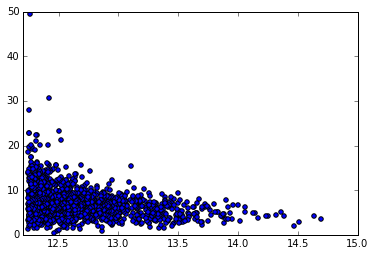

In [64]:
fig = plt.figure()
plt.scatter(np.log10(mass_density), conc_density)
plt.xlim([12.2,15.0])
plt.ylim([0.0,50.0])

In [65]:
n_bins = 7
log_mass_interval = np.linspace(12.25,14.5,n_bins)
mid_log_mass_interval = 0.5*(log_mass_interval[1:] + log_mass_interval[:-1])
mid_log_mass_interval =  log_mass_interval[:-1]

conc_median = np.ones((n_bins-1,3))
conc_up = np.ones((n_bins-1,3))
conc_down = np.ones((n_bins-1,3))

conc_median[:,0], conc_down[:,0], conc_up[:,0] = get_stats(log_mass_density,conc_density, log_mass_interval)
conc_median[:,1], conc_down[:,1], conc_up[:,1] = get_stats(log_mass_velocity,conc_velocity, log_mass_interval)
conc_median[:,2], conc_down[:,2], conc_up[:,2] = get_stats(log_mass_mass,conc_mass, log_mass_interval)


977
437
161
78
26
8
977
437
161
78
26
8
977
437
161
78
26
8


z 5.62371650045 -0.0615665057783


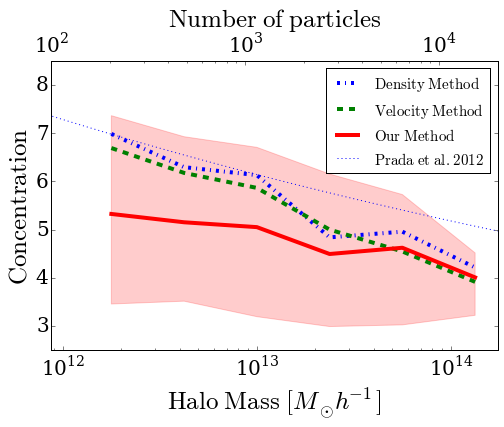

In [104]:
fig = plt.figure(figsize=(8.0,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

estilos = ['-.', '--', '-']
colores = ['blue', 'green', 'red']
origen = ['$\mathrm{Density\ Method}$','$\mathrm{Velocity\ Method}$','$\mathrm{Our\ Method}$']
for i in range(3):
    ax.plot(10**mid_log_mass_interval,conc_median[:,i],colores[i],lw=4,linestyle=estilos[i], label=origen[i])

ax.fill_between(10**mid_log_mass_interval,conc_down[:,2], conc_up[:,2], color=colores[2], alpha=0.2)

#datos de prada
log_mass_range = np.linspace(11.0, 15.0, 100)
conc_theory = 7.28 * (10**log_mass_range/(1.0E12))**-0.074
ax.plot(10**log_mass_range, conc_theory,label='$\mathrm{Prada\ et\ al.\ 2012}$', linestyle=':')

#fit
z = np.polyfit((mid_log_mass_interval - 12.0), np.log10(conc_median[:,2]), 1)
print "z", 10**z[1], z[0]

#datos del fit
#log_mass_range = np.linspace(11.0, 15.0, 100)
#conc_theory = 10**z[1]*(10**log_mass_range/(1E12))**z[0]
#ax.plot(10**log_mass_range, conc_theory,label='$\mathrm{Prada et al. 2012}$')


ax.legend(loc=1, borderaxespad=0.5, prop={'size':15})
plt.xlim([1E2*particle_mass,2E4*particle_mass])
#ax.plot(mid_log_mass_interval-np.log10(particle_mass),conc_median[:,0], lw=0)
ax.set_ylim([2.5,8.5])

ax2 = ax.twiny()
enlarge_labels(ax2,20)

plt.subplots_adjust(bottom=0.18, top=0.85)
ax2.set_xscale('log')
ax2.set_xlim([1E2,2E4])
ax2.set_ylim([2.5,8.5])

ax2.set_xlabel('$\mathrm{Number\ of\ particles}$',fontsize=25)
ax.set_xscale('log')
ax.set_xlabel('$\mathrm{Halo\ Mass}\ [M_{\odot} h^{-1}]$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration}$',fontsize=25)
plt.savefig("concentration.pdf")

In [80]:
index_greater = np.where(log_mass_density>12.5)
index_greater = index_greater[0]
print np.size(index_greater)
sort_index = np.argsort(log_mass_density[index_greater])
conc_density_sorted = conc_density[index_greater[sort_index]]

index_greater = np.where(log_mass_velocity>12.5)
index_greater = index_greater[0]
print np.size(index_greater)
sort_index = np.argsort(log_mass_velocity[index_greater])
conc_velocity_sorted = conc_velocity[index_greater[sort_index]]

index_greater = np.where(log_mass_mass>12.5)
index_greater = index_greater[0]
print np.size(index_greater)
sort_index = np.argsort(log_mass_mass[index_greater])
conc_mass_sorted = conc_mass[index_greater[sort_index]]

index_greater = np.where(log_mass_centers>12.5)
index_greater = index_greater[0]
print np.size(index_greater)
sort_index = np.argsort(log_mass_centers[index_greater])
data_centers_sorted = data_centers[sort_index, :]

log_mass_sorted = log_mass_centers[sort_index]

delta_center = np.sqrt((data_centers_sorted[:,2] - data_centers_sorted[:,5])**2
                    + (data_centers_sorted[:,3] - data_centers_sorted[:,6])**2
                    + (data_centers_sorted[:,4] - data_centers_sorted[:,7])**2)
delta_center = delta_center/data_centers_sorted[:,12]

delta0 = data_centers_sorted[:,8] + data_centers_sorted[:,9] + data_centers_sorted[:,10]
lambda1 = np.amax(data_centers_sorted[:,8:11], axis=1)
lambda3 = np.amin(data_centers_sorted[:,8:11], axis=1)
lambda2 = delta0 - lambda1 - lambda3
ellipticity = (lambda1-lambda3)/(2.0 * delta0)
prolateness = (lambda1+lambda3 - 2.0*lambda2)/(2.0*delta0)
q_shape = np.sqrt((3.0*ellipticity**2 + prolateness**2))

967
967
967
967


In [81]:
def plot_dependence(parameter, ratio, bins=7):
    bin_parameter = np.linspace(np.min(parameter),np.max(parameter),bins)
    center_parameter = 0.5*(bin_parameter[0:-1] + bin_parameter[1:])
    ratio_center, ratio_down, ratio_up = get_stats(parameter, ratio, bin_parameter)
    plt.plot(center_parameter, ratio_center, linewidth=10)
    plt.fill_between(center_parameter,ratio_down, ratio_up, alpha=0.2)

98
630
180
46
10


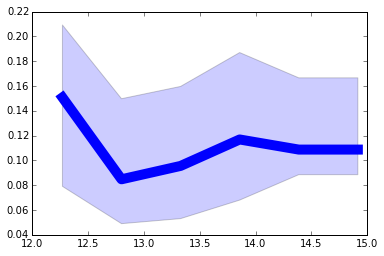

In [82]:
plot_dependence(log_mass_sorted, ellipticity, bins=7)

98
630
180
46
10


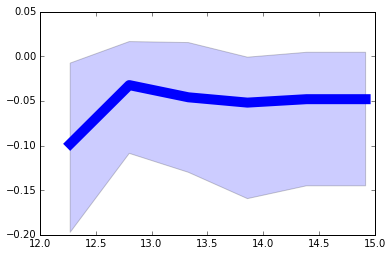

In [83]:
plot_dependence(log_mass_sorted, prolateness, bins=7)

98
630
180
46
10


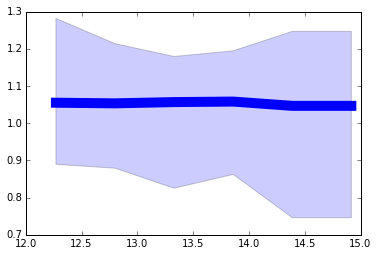

In [84]:
plot_dependence(log_mass_sorted, conc_density_sorted/conc_velocity_sorted, bins=7)

98
630
180
46
10


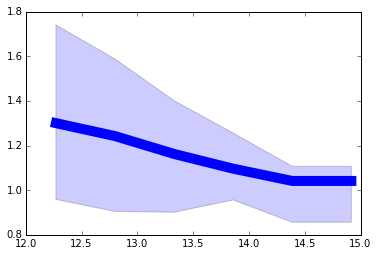

In [85]:
plot_dependence(log_mass_sorted, conc_density_sorted/conc_mass_sorted, bins=7)

71
124
278
370
104
11


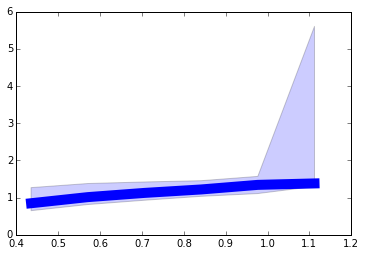

In [86]:
plot_dependence(np.log10(conc_velocity_sorted), conc_velocity_sorted/conc_mass_sorted, bins=7)

3
24
171
510
250
7
2
18
112
322
177
9


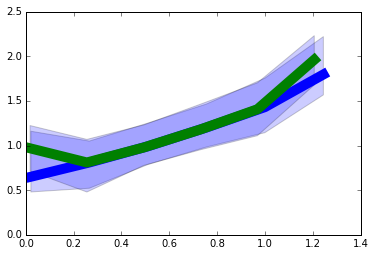

In [87]:
ratio = conc_density_sorted/conc_mass_sorted
plot_dependence(np.log10(conc_density_sorted), ratio, bins=7)
plot_dependence(np.log10(conc_density_sorted[delta_center>0.10]), ratio[delta_center>0.10], bins=7)

3
9
102
414
408
29


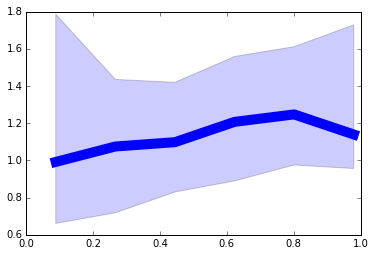

In [88]:
ratio = conc_density_sorted/conc_mass_sorted
plot_dependence(np.log10(conc_mass_sorted), ratio, bins=7)

98
630
180
46
10
149
96
47
21
9
24
66
34
18
7
6


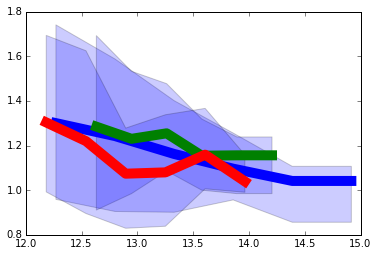

In [89]:
ratio = conc_density_sorted/conc_mass_sorted
plot_dependence(log_mass_sorted, ratio, bins=7)
plot_dependence(log_mass_sorted[delta_center<0.10], ratio[delta_center<0.10], bins=7)
plot_dependence(log_mass_sorted[delta_center>0.40], ratio[delta_center>0.40], bins=7)

98
630
180
46
10
256
190
72
22
5
2
49
63
22
12
3


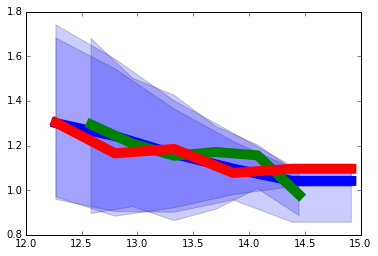

In [90]:
ratio = conc_density_sorted/conc_mass_sorted
plot_dependence(log_mass_sorted, ratio, bins=7)
plot_dependence(log_mass_sorted[ellipticity<0.10], ratio[ellipticity<0.10], bins=7)
plot_dependence(log_mass_sorted[ellipticity>0.15], ratio[ellipticity>0.15], bins=7)

3
9
102
414
408
29


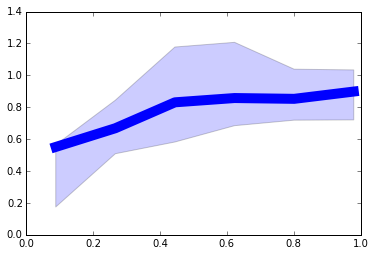

In [91]:
plot_dependence(np.log10(conc_mass_sorted), conc_mass_sorted/conc_velocity_sorted, bins=7)

769
113
53
18
9
3


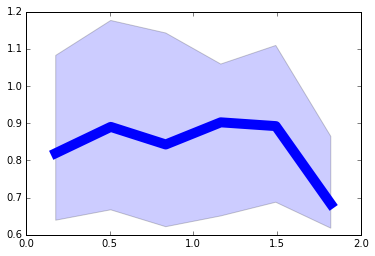

In [92]:
plot_dependence(delta_center, conc_mass_sorted/conc_density_sorted, bins=7)

51
334
303
149
85
43


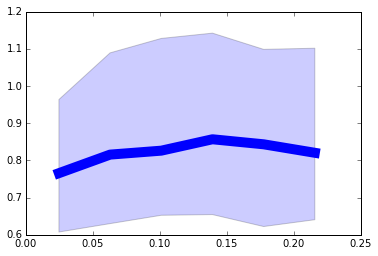

In [93]:
plot_dependence(ellipticity, conc_mass_sorted/conc_density_sorted, bins=7)

48
71
176
343
284
43


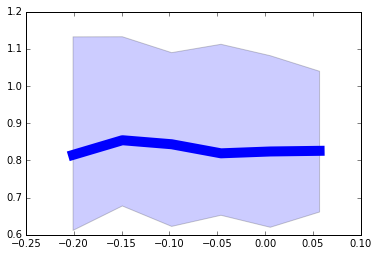

In [94]:
plot_dependence(prolateness, conc_mass_sorted/conc_density_sorted, bins=7)

23
270
446
225


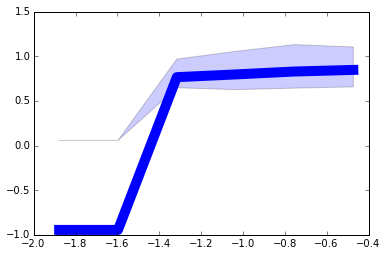

In [95]:
plot_dependence(np.log10(q_shape), conc_mass_sorted/conc_density_sorted, bins=7)

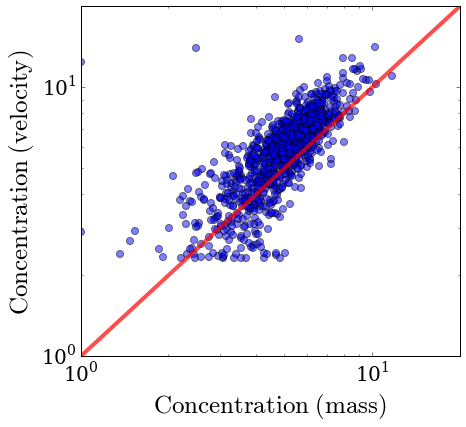

In [96]:
fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

x = np.linspace(0.0,100, 100)
plt.plot(x,x, color='red', linewidth=4, alpha=0.7)
plt.scatter(conc_mass_sorted, conc_velocity_sorted, s=50, alpha=0.5)

plt.xlim([1,20])
plt.ylim([1,20])

plt.subplots_adjust(bottom=0.18, top=0.99, left=0.18, right=0.99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{Concentration\ (mass)}$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration\ (velocity)}$',fontsize=25)
plt.savefig("conc_mass_vel.pdf")

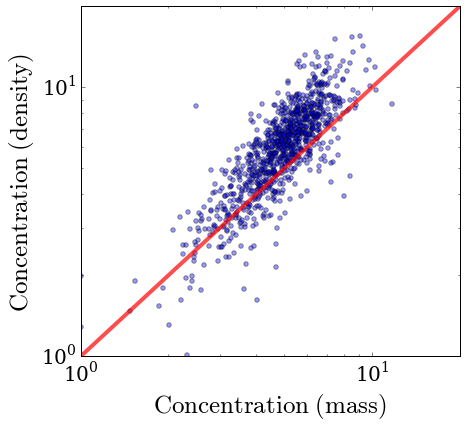

In [97]:
fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

x = np.linspace(0.0,100, 100)
plt.plot(x,x, color='red', linewidth=4, alpha=0.7)
plt.scatter(conc_mass_sorted, conc_density_sorted, s=20, alpha=0.4)

plt.xlim([1,20])
plt.ylim([1,20])

plt.subplots_adjust(bottom=0.18, top=0.99, left=0.18, right=0.99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{Concentration\ (mass)}$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration\ (density)}$',fontsize=25)
plt.savefig("conc_mass_dens.pdf")

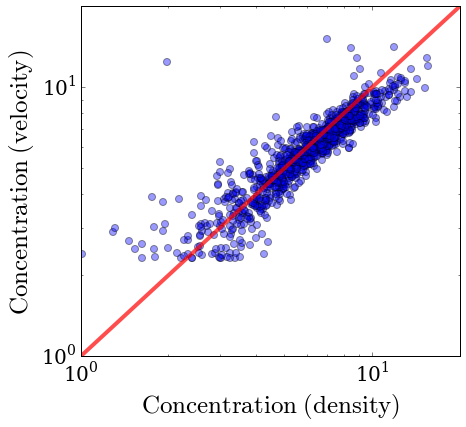

In [98]:
fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

x = np.linspace(0.0,100, 100)
plt.plot(x,x, color='red', linewidth=4, alpha=0.7)
plt.scatter(conc_density_sorted, conc_velocity_sorted, s=50, alpha=0.4)

plt.xlim([1,20])
plt.ylim([1,20])

plt.subplots_adjust(bottom=0.18, top=0.99, left=0.18, right=0.99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{Concentration\ (density)}$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration\ (velocity)}$',fontsize=25)
plt.savefig("conc_dens_vel.pdf")

In [99]:
#now comes the comparison of the mock halos

In [100]:
density_filename = "../data/test/mock_100/newDensity/table.csv"
velocity_filename = "../data/test/mock_100/velocity/table.csv"
mass_filename = "../data/test/mock_100/newMass/table.csv"

In [101]:
density_data = np.loadtxt(density_filename, delimiter=',')
velocity_data = np.loadtxt(velocity_filename, delimiter=',')
mass_data = np.loadtxt(mass_filename, delimiter=',')

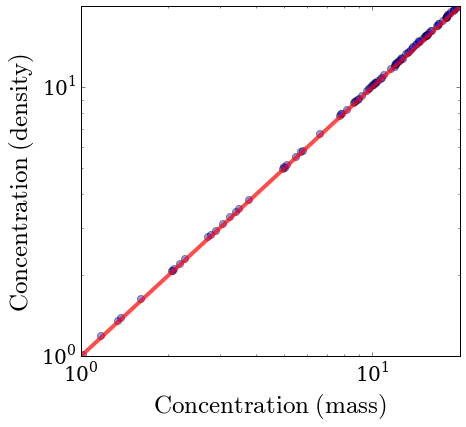

In [31]:

fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

x = np.linspace(0.0,25, 100)
plt.plot(x,x, color='red', linewidth=4, alpha=0.7)
plt.scatter(mass_data[:,2], density_data[:,2],s=50, alpha=0.4)


plt.xlim([1,20])
plt.ylim([1,20])

plt.subplots_adjust(bottom=0.18, top=0.99, left=0.18, right=0.99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{Concentration\ (mass)}$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration\ (density)}$',fontsize=25)
plt.savefig("conc_mass_dens_intrinsic.pdf")

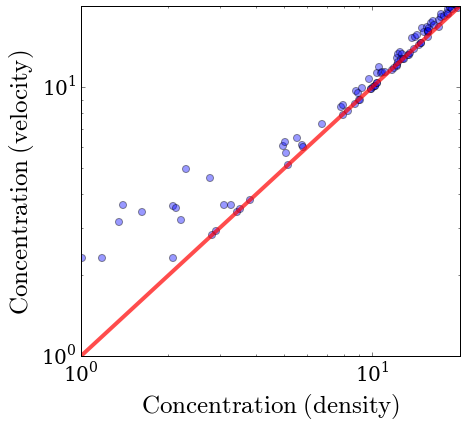

In [32]:

fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

x = np.linspace(0.0,25, 100)
plt.plot(x,x, color='red', linewidth=4, alpha=0.7)
plt.scatter(density_data[:,2], velocity_data[:,2],s=50, alpha=0.4)


plt.xlim([1,20])
plt.ylim([1,20])

plt.subplots_adjust(bottom=0.18, top=0.99, left=0.18, right=0.99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{Concentration\ (density)}$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration\ (velocity)}$',fontsize=25)
plt.savefig("conc_dens_vel_intrinsic.pdf")

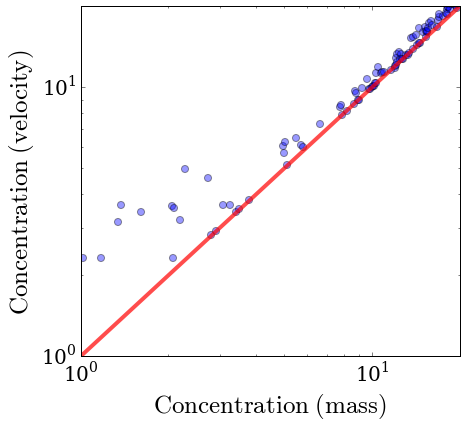

In [33]:

fig = plt.figure(figsize=(6.5,6.0))
ax = plt.axes()

enlarge_labels(ax,20)

x = np.linspace(0.0,25, 100)
plt.plot(x,x, color='red', linewidth=4, alpha=0.7)
plt.scatter(mass_data[:,2], velocity_data[:,2],s=50, alpha=0.4)


plt.xlim([1,20])
plt.ylim([1,20])

plt.subplots_adjust(bottom=0.18, top=0.99, left=0.18, right=0.99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\mathrm{Concentration\ (mass)}$',fontsize=25)
ax.set_ylabel('$\mathrm{Concentration\ (velocity)}$',fontsize=25)
plt.savefig("conc_mass_vel_intrinsic.pdf")

17
8
19
19
18
17
17
8
19
19
18
17
17
8
19
19
18
17


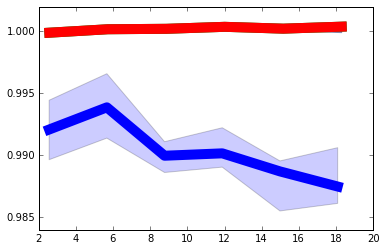

In [34]:
ratio = mass_data[:,2]/density_data[:,2]
plot_dependence(mass_data[:,2], ratio, bins=7)

ratio = mass_data[:,3]/density_data[:,3]
plot_dependence(mass_data[:,3], ratio, bins=7)

ratio = mass_data[:,3]/density_data[:,3]
plot_dependence(mass_data[:,3], ratio, bins=7)